In [36]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf
import os

In [37]:
#import dataset
df = pd.read_csv('monthlyECB.csv')
df.head()

,Date,RGDP,HICP,M1,M3,LNFC,LHH,LNFPS,LRNFCSPR,LRHHSPR,...,ESI,INDCONF,CSTRCONF,STOASSESS,BCI,CONCONF,RETCONF,SERVCONF,PMIMAN,PMICOMP
0,Jan-90,597371,59.1,47.7,51.9,NaN,NaN,2679517.2,0.3,0.3,...,112.2,4.420,1.745,5.213,1.032,-2.296,2.870,NaN,NaN,NaN
1,Feb-90,601086,59.3,47.7,52.2,NaN,NaN,2696716.7,0.7,1.0,...,110.7,3.050,1.393,7.114,0.937,-2.362,0.997,NaN,NaN,NaN
2,Mar-90,605929,59.4,47.7,52.3,NaN,NaN,2707230.9,1.0,1.2,...,111.4,3.751,0.753,4.378,0.902,-3.105,1.360,NaN,NaN,NaN
3,Apr-90,599419,59.6,47.7,52.6,NaN,NaN,2726703.1,1.3,1.6,...,111.1,3.147,0.501,5.215,0.850,-2.472,-0.125,NaN,NaN,NaN
4,May-90,607814,59.7,48.0,52.8,NaN,NaN,2745231.0,1.3,1.8,...,109.6,1.919,-1.567,5.003,0.806,-3.352,1.214,NaN,NaN,NaN


In [40]:
rgdp = df['RGDP'].values.astype(float)
m1 = df['M1'].values.astype(float)

rgdp_lag = np.roll(rgdp, 1)
rgdp_lag[0] = 0

quant_reg_1 = sm.QuantReg(rgdp, rgdp_lag + m1).fit(q=0.1)
quant_reg_5 = sm.QuantReg(rgdp, rgdp_lag + m1).fit(q=0.5)
quant_reg_9 = sm.QuantReg(rgdp, rgdp_lag + m1).fit(q=0.9)
# Print the summary of the quantile regression results
print(quant_reg_1.summary())
print(quant_reg_5.summary())
print(quant_reg_9.summary())


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.9166
Model:                       QuantReg   Bandwidth:                       2542.
Method:                 Least Squares   Sparsity:                    3.125e+04
Date:                Sat, 04 Mar 2023   No. Observations:                  390
Time:                        17:05:08   Df Residuals:                      389
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9935      0.001   1623.512      0.000       0.992       0.995
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.9320
Model:                       QuantReg   Bandwidth:  

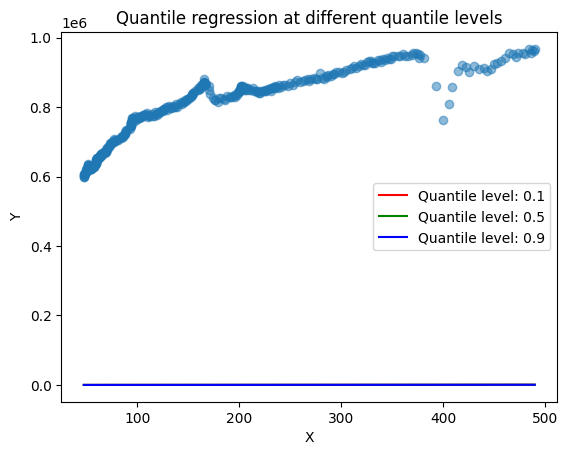

In [41]:
################################ Quantile regression plot ##############################
################################ Yt = α + βYt-1 + γXt + εt + θεt-1
# Create a scatter plot of the data
plt.scatter(m1, rgdp, alpha=0.5)

# Plot the quantile regression lines at different quantile levels
x_sort = np.sort(m1)
y_pred_1 = quant_reg_1.predict(x_sort)
y_pred_5 = quant_reg_5.predict(x_sort)
y_pred_9 = quant_reg_9.predict(x_sort)

plt.plot(x_sort, y_pred_1, color='red', label='Quantile level: 0.1')
plt.plot(x_sort, y_pred_5, color='green', label='Quantile level: 0.5')
plt.plot(x_sort, y_pred_9, color='blue', label='Quantile level: 0.9')

# Add a legend and labels to the plot
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quantile regression at different quantile levels')
plt.show()


In [ ]:
M1	M3	LNFC	LHH	LNFPS	LRNFCSPR	LRHHSPR	LRNFPSSPR	CRSPR	YC3M	YC1Y	YC2Y	YC3Y	YC2YW	YCEONIA	EATEDSPR	STP	USDEUROXRATE	NEER	VSTOXX	FCIBME	FCIVAR	FCIIPA	FCIBBG	FCIGS	CISS	CISSnew	OILPUSD	GAPPEURUSD	RAWMATPUSD	IP	UR	EMPL	RETTRADE	EUROCOIN	ESI	INDCONF	CSTRCONF	STOASSESS	BCI	CONCONF	RETCONF	SERVCONF	PMIMAN	PMICOMP